In [84]:
import pandas as pd

df = pd.read_csv('total_cbs.csv', sep= ';')
df

,Unnamed: 0,Periods,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020,2021*
0,Industrial waste,Recovery and final processing,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes,1 000 tonnes
1,Total by processing,Total industrial waste,16315,16072,14339,14400,13858,14125,14654,14270,13716,13361,13611
2,Total by processing,Total recovery,15005,14740,13075,13108,13260,13478,13959,13563,12993,12730,13048
3,Total by processing,Total final processing,1310,1332,1264,1292,597,647,695,707,723,631,563


In [85]:
df.drop(0, axis = 0, inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df

,Periods,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020,2021*
1,Total industrial waste,16315,16072,14339,14400,13858,14125,14654,14270,13716,13361,13611
2,Total recovery,15005,14740,13075,13108,13260,13478,13959,13563,12993,12730,13048
3,Total final processing,1310,1332,1264,1292,597,647,695,707,723,631,563


In [86]:
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)

In [87]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x/1000)

In [88]:
df = df.T
df

,1,2,3
Periods,Total industrial waste,Total recovery,Total final processing
2007,16.315,15.005,1.31
2008,16.072,14.74,1.332
2009,14.339,13.075,1.264
2010,14.4,13.108,1.292
2015,13.858,13.26,0.597
2016,14.125,13.478,0.647
2017,14.654,13.959,0.695
2018,14.27,13.563,0.707
2019,13.716,12.993,0.723


In [89]:
#remove index
df.reset_index(inplace = True)

#make row 1 the index
df.columns = df.iloc[0]
df.drop(0, axis = 0, inplace = True)
df

,Periods,Total industrial waste,Total recovery,Total final processing
1,2007,16.315,15.005,1.31
2,2008,16.072,14.74,1.332
3,2009,14.339,13.075,1.264
4,2010,14.4,13.108,1.292
5,2015,13.858,13.26,0.597
6,2016,14.125,13.478,0.647
7,2017,14.654,13.959,0.695
8,2018,14.27,13.563,0.707
9,2019,13.716,12.993,0.723
10,2020,13.361,12.73,0.631


In [90]:
#fix 2021* to 2021
df.replace('2021*', '2021', inplace = True)
df

#make periods into datetime format
df['Periods'] = pd.to_datetime(df['Periods'], format = '%Y')

In [91]:
df

,Periods,Total industrial waste,Total recovery,Total final processing
1,2007-01-01,16.315,15.005,1.31
2,2008-01-01,16.072,14.74,1.332
3,2009-01-01,14.339,13.075,1.264
4,2010-01-01,14.4,13.108,1.292
5,2015-01-01,13.858,13.26,0.597
6,2016-01-01,14.125,13.478,0.647
7,2017-01-01,14.654,13.959,0.695
8,2018-01-01,14.27,13.563,0.707
9,2019-01-01,13.716,12.993,0.723
10,2020-01-01,13.361,12.73,0.631


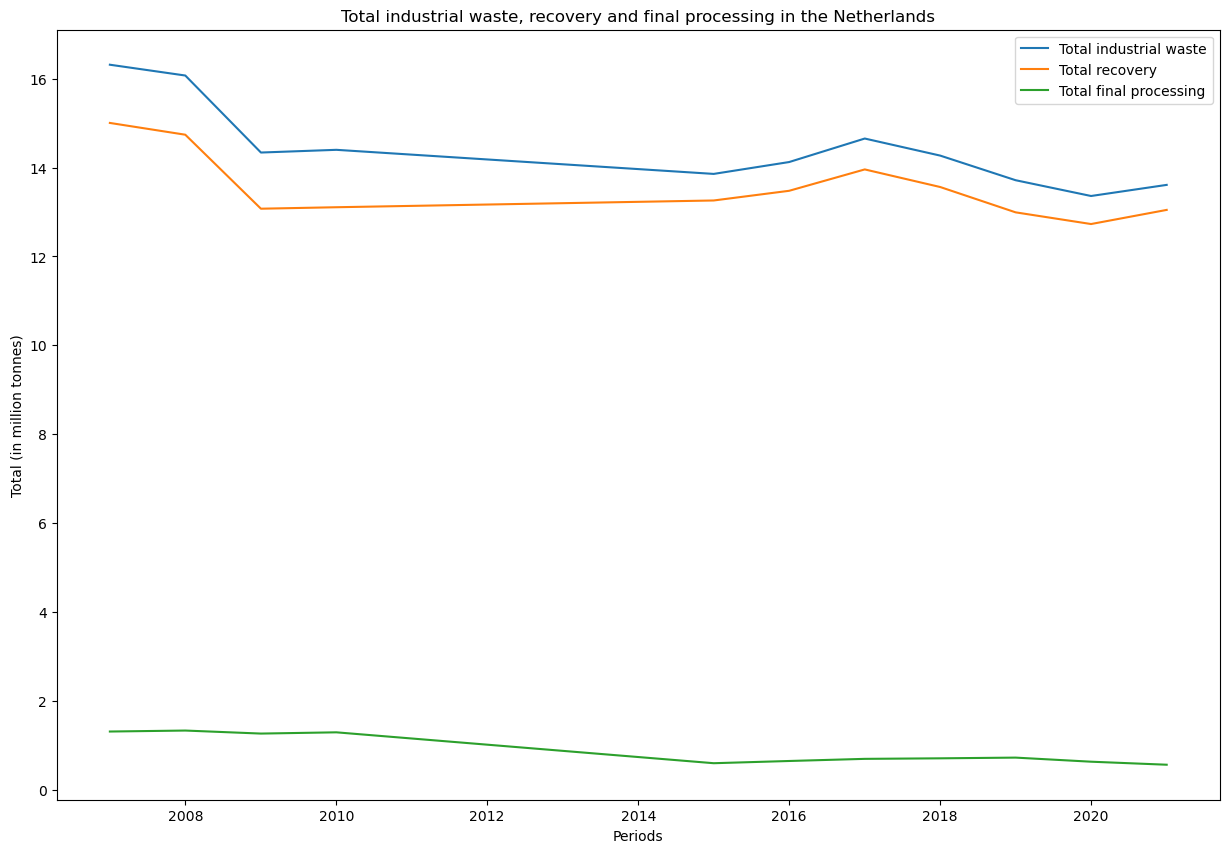

In [96]:
#plot the data

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.plot(df['Periods'], df['Total industrial waste'], label = 'Total industrial waste')
plt.plot(df['Periods'], df['Total recovery'], label = 'Total recovery')
plt.plot(df['Periods'], df['Total final processing'], label = 'Total final processing')

plt.legend()
plt.xlabel('Periods')
plt.ylabel('Total (in million tonnes)')
plt.title('Total industrial waste, recovery and final processing in the Netherlands')

plt.show()

# add a heading on the y axis
